# **Horizontal violin**

#### ใช้เปรียบเทียบการกระจายของข้อมูลหลายๆกลุ่ม 

#### ใช้ฟังก์ชั่น **geom_violin()** และใช้ **coord_flip()** ในการพลิกแกน x,y สลับกัน

####  ใช้ **theme_ipsum** ของ hrbrthemes เพื่อช่วยให้น่าสนใจมากยิ่งขึ้น

Installing package into 'C:/Users/Lenovo/Documents/R/win-library/3.6'
(as 'lib' is unspecified)

Warning message:
"package 'hrbrthemes' is in use and will not be installed"
Installing package into 'C:/Users/Lenovo/Documents/R/win-library/3.6'
(as 'lib' is unspecified)

Warning message:
"package 'viridis' is in use and will not be installed"
Warning message:
"position_dodge requires non-overlapping x intervals"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$

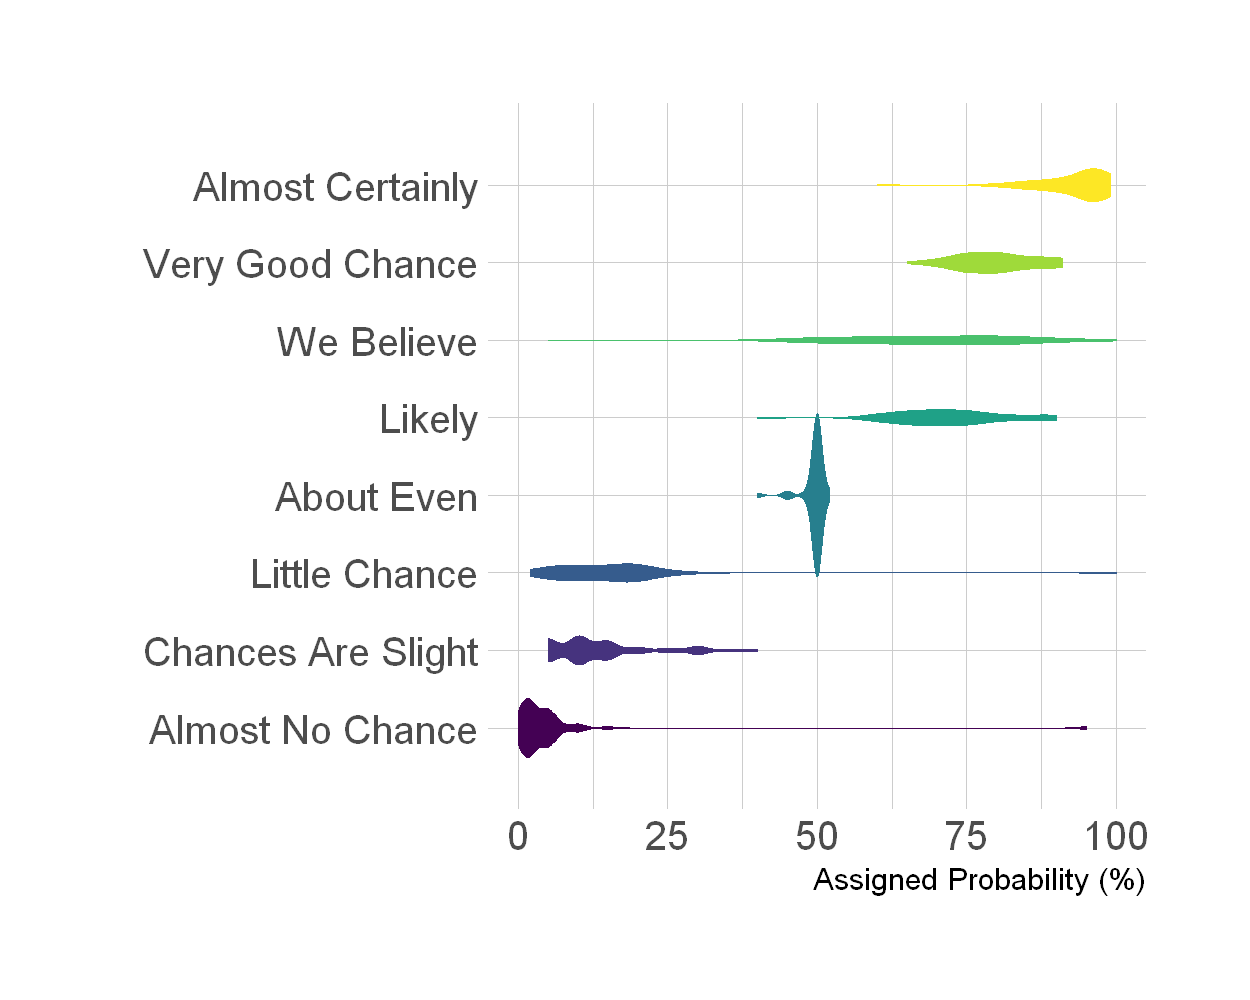

In [6]:
install.packages("hrbrthemes")
install.packages("viridis")

# Libraries
library(ggplot2)
library(dplyr)
library(tidyr)
library(forcats)
library(hrbrthemes)
library(viridis)

# Load dataset from github
data <- read.table("https://raw.githubusercontent.com/zonination/perceptions/master/probly.csv", header=TRUE, sep=",")

# Data is at wide format, we need to make it 'tidy' or 'long'
data <- data %>% 
  gather(key="text", value="value") %>%
  mutate(text = gsub("\\.", " ",text)) %>%
  mutate(value = round(as.numeric(value),0)) %>%
  filter(text %in% c("Almost Certainly","Very Good Chance","We Believe","Likely","About Even", "Little Chance", "Chances Are Slight", "Almost No Chance"))

# Plot
p <- data %>%
  mutate(text = fct_reorder(text, value)) %>% # Reorder data
  ggplot( aes(x=text, y=value, fill=text, color=text)) +
    geom_violin(width=2.1, size=0.2) +
    scale_fill_viridis(discrete=TRUE) +
    scale_color_viridis(discrete=TRUE) +
    theme_ipsum() +
    theme(
      legend.position="none"
    ) +
    coord_flip() + # This switch X and Y axis and allows to get the horizontal version
    xlab("") +
    ylab("Assigned Probability (%)")
    options(repr.plot.width  = 5, repr.plot.height = 4, repr.plot.res = 250)

p